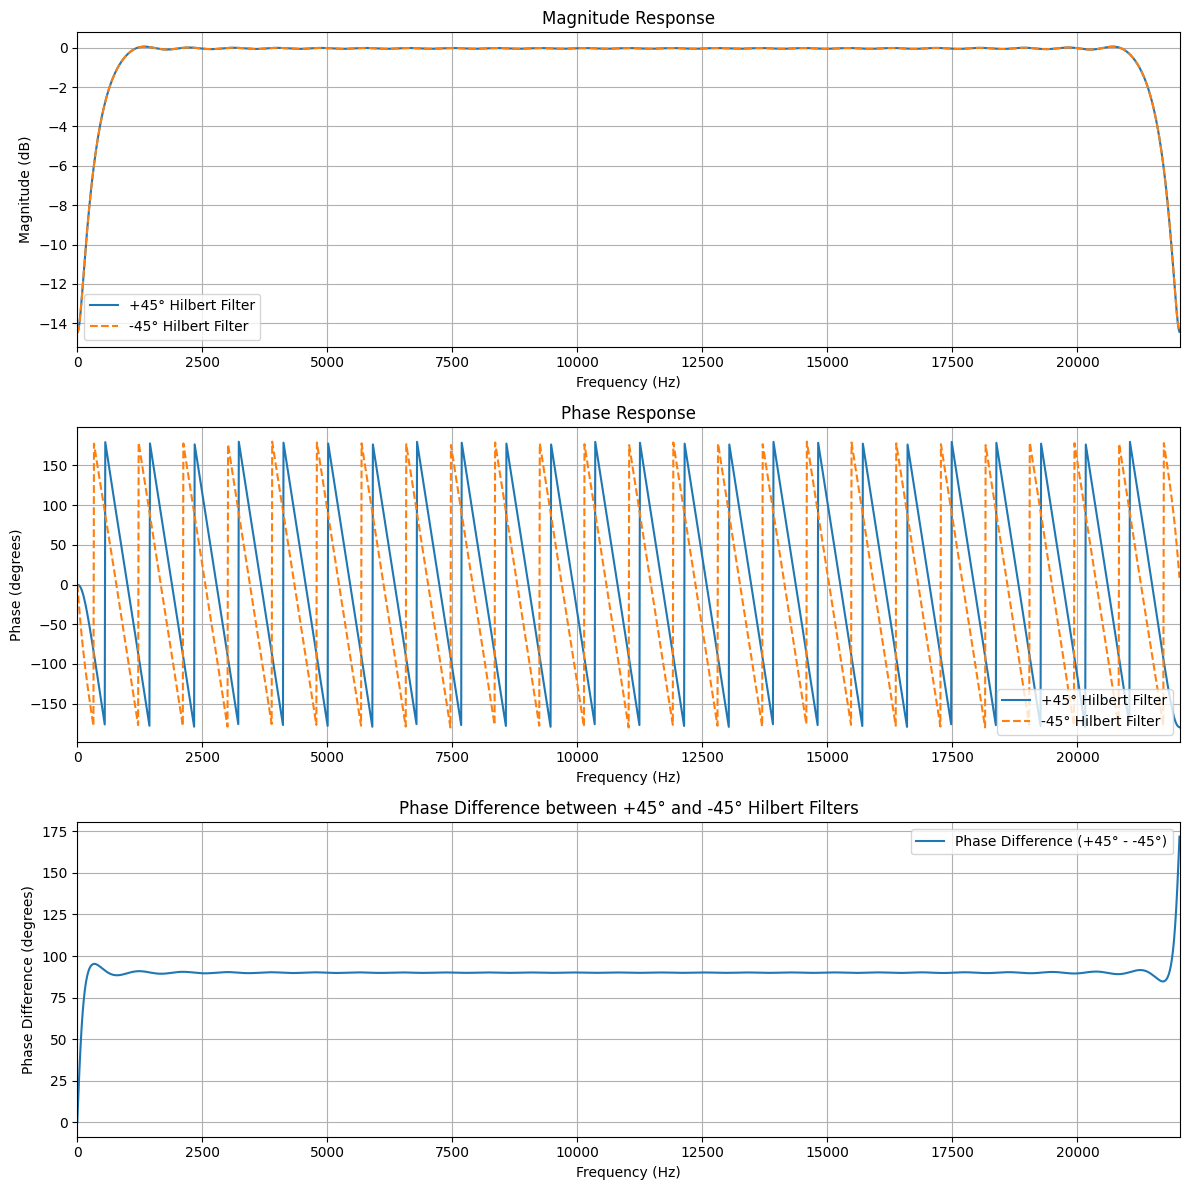

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sampling frequency
fs = 44100  # 44.1 kHz

# Hilbert filter coefficients for +45 degrees (array 1)
coeffs_plus_45 = [
    428.8698225779810E-18, 0.000866962256721964, 669.4578973884190E-18, 0.000723768779644489,
    625.1950335026000E-18, 0.000491948708636800, 932.9793308652210E-18, 0.000162753915054888,
    120.6877891916540E-18, -0.000267138492850143, 368.6242120344090E-18, -0.000794106419837781,
    -335.0841016622350E-18, -0.001406158205346857, 508.6725057380440E-18, -0.002081653046072215,
    525.4639122859110E-18, -0.002788189076768316, 1.997158538844780E-15, -0.003481638971364546,
    1.521786931189910E-15, -0.004105248229979659, 1.999269938576540E-15, -0.004588612972905914,
    1.642012534044480E-15, -0.004846199063150177, 2.321256832370990E-15, -0.004774806025839937,
    1.472463356633780E-15, -0.004248919032053459, 3.256022898511980E-15, -0.003112012423934955,
    2.885150851939090E-15, -0.001160058329106086, 4.963134919021790E-15, 0.001890534040148042,
    7.256657980479030E-15, 0.006468126105579311, 9.877273082232760E-15, 0.013288374303952424,
    9.998257606955500E-15, 0.023701141617936898, 13.04841388605350E-15, 0.040681358385972734,
    13.16584420291990E-15, 0.072465913204806887, 18.32157501742890E-15, 0.153651468095950122,
    45.04853770616490E-15, 0.872643185009882805, -124.9775599534200E-15, -0.320482045163527962,
    -21.83135851203050E-15, -0.147353662629853055, -13.25350771085950E-15, -0.098220446790738603,
    -9.869993202619540E-15, -0.073799181987711918, -4.594216166446000E-15, -0.058469211844324492,
    -3.304347777777260E-15, -0.047522100992294508, 104.5764716612020E-18, -0.039075967510059088,
    1.357742476364510E-15, -0.032247860767888339, 1.609834995034210E-15, -0.026578009579594275,
    302.9110018978720E-18, -0.021807474489618426, 1.269751717122650E-15, -0.017779413498920069,
    -245.5156751402480E-18, -0.014390646510711955, 431.8593097590070E-18, -0.011566204186358037,
    -20.73528334337070E-18, -0.009245418095997261, 493.9755466124440E-18, -0.007374279468676965,
    251.3569241845640E-18, -0.005901425606391064, 1.464223979968000E-15, -0.004776322329186264,
    697.1003972531060E-18, -0.003948802940774603, 814.1476939065410E-18, -0.003369432187206015,
    -316.1136311572910E-18, -0.002990334964793745, -90.52589606482270E-18, -0.002766233025766330,
    -696.4043762789310E-18, -0.002655502116741105, -32.56402058849020E-18, -0.002621113453607914,
    -86.94556986426840E-18, -0.002631365320034318, 85.18103595547740E-18, -0.002660346625915069
]

# Hilbert filter coefficients for -45 degrees (array 2)
coeffs_minus_45 = [
    -0.002660346625914681, -142.5615451960800E-18, -0.002631365320034742, 72.39460181599930E-18,
    -0.002621113453608740, 365.6625573314080E-18, -0.002655502116741606, -268.1406471145040E-18,
    -0.002766233025766440, 522.9276890266240E-18, -0.002990334964794087, -607.0059499422990E-18,
    -0.003369432187205082, -73.23460201465080E-18, -0.003948802940773903, -476.4056590717670E-18,
    -0.004776322329185343, -312.9479342217880E-18, -0.005901425606389074, -599.2210655172320E-18,
    -0.007374279468676095, -257.5055438396270E-18, -0.009245418095996334, -1.432636145077280E-15,
    -0.011566204186357842, 185.5776728505920E-18, -0.014390646510711451, -1.223169894210750E-15,
    -0.017779413498919743, -507.7725019792790E-18, -0.021807474489616407, -149.4865846637370E-18,
    -0.026578009579593605, -561.9513689420920E-18, -0.032247860767886542, -684.5163433330340E-18,
    -0.039075967510061899, 2.312619114749650E-15, -0.047522100992295140, 550.8313753159310E-18,
    -0.058469211844333152, 3.653449213341470E-15, -0.073799181987724130, 5.543566341328550E-15,
    -0.098220446790761515, 7.591005706981040E-15, -0.147353662629886223, 21.75090500727820E-15,
    -0.320482045163644980, 129.4663938604830E-15, 0.872643185009816635, -48.86088790795220E-15,
    0.153651468095996002, -23.34181949236510E-15, 0.072465913204831797, -12.73860359379920E-15,
    0.040681358385996375, -9.967403549770980E-15, 0.023701141617955505, -8.913611311437650E-15,
    0.013288374303971109, -5.120441418271150E-15, 0.006468126105590283, -6.713751021471820E-15,
    0.001890534040160306, -4.214988052861760E-15, -0.001160058329098612, -3.133467475213760E-15,
    -0.003112012423928077, -3.051927453298240E-15, -0.004248919032049460, -2.728321242007810E-15,
    -0.004774806025835775, -1.212682271632930E-15, -0.004846199063146594, -2.473499615604520E-15,
    -0.004588612972902101, -705.6223879923200E-18, -0.004105248229976594, -1.187392338537970E-15,
    -0.003481638971361474, -741.7226001046070E-18, -0.002788189076767050, -803.9975667293950E-18,
    -0.002081653046071019, -405.8558361122810E-18, -0.001406158205345744, -732.4771536664670E-18,
    -0.000794106419837717, 203.7380889287510E-18, -0.000267138492849360, -791.8767863321210E-18,
    0.000162753915055431, -99.16131906296190E-18, 0.000491948708637530, -608.0720937020530E-18,
    0.000723768779645844, -586.4325834209240E-18, 0.000866962256723557, -333.7536727527920E-18
]

# Compute frequency response
w, h_plus = freqz(coeffs_plus_45, worN=2048, fs=fs)
w, h_minus = freqz(coeffs_minus_45, worN=2048, fs=fs)

# Magnitude in dB
mag_plus = 20 * np.log10(np.abs(h_plus))
mag_minus = 20 * np.log10(np.abs(h_minus))

# Phase in degrees
phase_plus = np.angle(h_plus, deg=True)
phase_minus = np.angle(h_minus, deg=True)

# Phase difference (wrapped to [-180, 180] degrees)
phase_diff = np.angle(np.exp(1j * (phase_plus - phase_minus) * np.pi / 180)) * 180 / np.pi

# Plotting
plt.figure(figsize=(12, 12))

# Magnitude response
plt.subplot(3, 1, 1)
plt.plot(w, mag_plus, label='+45° Hilbert Filter')
plt.plot(w, mag_minus, label='-45° Hilbert Filter', linestyle='--')
plt.title('Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.legend()
plt.xlim(0, fs/2)

# Phase response
plt.subplot(3, 1, 2)
plt.plot(w, phase_plus, label='+45° Hilbert Filter')
plt.plot(w, phase_minus, label='-45° Hilbert Filter', linestyle='--')
plt.title('Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.grid(True)
plt.legend()
plt.xlim(0, fs/2)

# Phase difference
plt.subplot(3, 1, 3)
plt.plot(w, phase_diff, label='Phase Difference (+45° - -45°)')
plt.title('Phase Difference between +45° and -45° Hilbert Filters')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase Difference (degrees)')
plt.grid(True)
plt.legend()
plt.xlim(0, fs/2)

plt.tight_layout()
plt.show()